In [19]:
import os
Rutedir = os.path.dirname(os.path.abspath('__file__'))
print(Rutedir)
print(os.path.join(Rutedir,"Inputs\cyclelist.csv"))
rute=os.path.join(Rutedir,"Inputs\cyclelist.csv")

import pandas as pd
dftessy=pd.read_csv(rute,skiprows=1,header=0,)
dftessy.head()

x:\TA-Turbine-Design-13118082
x:\TA-Turbine-Design-13118082\Inputs\cyclelist.csv


,Unnamed: 0,fluid,T_1,P_1,T_5,P_5,mflow
0,1,R245fa,360.0,0.9,335.4,0.4,0.5
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
from definitions import *
import numpy as np
import pandas as pd
print(ROOT_DIR)
global p
n=0
p=np.zeros(shape=(6, 6))
dffitfun = pd.read_csv(os.path.join(ROOT_DIR,"Inputs","fittedpolycoeffs",f"{n}.csv"),skiprows=5,usecols=range(1,7),header=0,index_col=False)
dffitfun.tail()
for i in range(0,6):
    for j in range(0,6):
        p[i][j]=dffitfun.iloc[i][j]
print(p)
print(p[5][0]*p[5][5])

x:\TA-Turbine-Design-13118082
[[ 9.  8.  7.  6.  5. 54.]
 [ 5.  0. nan nan nan nan]
 [ 4. nan  3. nan nan nan]
 [77. nan nan nan  3. nan]
 [ 4. nan nan nan nan  2.]
 [67. nan nan nan nan 69.]]
4623.0


In [139]:
import pandas as pd
import os
from ifrturbinepackage.definitions import *
import numpy as np
# gparamlist=[Rr5r4,Rb5b4,Rb4r4,RZrr4,NR]
# i=1
# dfgparams=pd.read_csv(os.path.join(ROOT_DIR,"Inputs\gparamslist.csv"),skiprows=1,header=0,index_col=0)
# dfgparams.head()
gparamlist=[[Rr5r4,'Rr5r4'],[Rb5b4,'Rb5b4'],[Rb4r4,'Rb4r4'],[RZrr4,'RZrr4'],[NR,'NR']]
dfgparams=pd.read_csv(os.path.join(ROOT_DIR,"Inputs\gparamslist.csv"),skiprows=1,header=0,index_col=0)
dfgparams.head()
for x in list(dfgparams.columns):
    print(x)
# print (np.shape(gparamlist)[0])
# k=1
# for x in range(np.shape(gparamlist)[0]):
#     gparamlist[x][0]=dfgparams.iloc[k-1][gparamlist[x][1]]
#     print(gparamlist[x][1],gparamlist[x][0])
# print(dfgparams.iloc[])

# for x in gparamlist:
#     x = dfgparams.iloc[i-1][y]

Rr5r4
Rb5b4
Rb4r4
RZrr4
NR


In [128]:
from ifrturbinepackage.definitions import *
from ifrturbinepackage.inputs import *
from ifrturbinepackage.rotor import *
from ifrturbinepackage.nozzle import *
from ifrturbinepackage.volute import *

whichcycle(10)
print(T_5)

NameError: name 'T_5' is not defined

In [134]:
dummydict={'dum':98,'dim':97}
print(dummydict['dum'])

globals().update(dummydict)
print(dum,dim)

98
98 97


In [1]:
from ifrturbinepackage.rotor import *
inlist=[1,2,3,4,5,6,7]
# global Zr
# Zr=0.05
# dum=QuasiNorm(dumlist)
translist=['b4','r4','Zr','rs5','rh5','n','Z5']
for i in range(len(translist)):
    locals()[translist[i]]=inlist[i]
print(Zr,Z5,rh5)
dum=QuasiNorm(inlist)

3 7 5
1 3


NameError: name 'Cm5' is not defined

In [4]:
zxc='dumvee'
locals()[zxc]=8
print(dumvee)
print(len(dumlist))

8
7


In [33]:
import numpy as np
import scipy as sp
import sympy as smp


In [6]:
r4,rs5,deltzr,b4,z,z5,n = smp.symbols('r4 rs5 deltzr b4 z z5 n', real = True,positive=True)
# r = rs5 + (r4-rs5)*((z-z5)/(deltzr-b4))**n
drperdz = (r4-rs5)/(deltzr-b4)**n * n * (z-z5)**(n-1)
f = smp.sqrt(1+(drperdz)**2)
smp.integrate(f,z).simplify

In [13]:
A,n,z,z5 = smp.symbols('A n z z5',real=True,positive=True)
f = smp.sqrt(1+(A*n*(z-z5)**(n-1))**2)
smp.integrate(f,z).simplify()

(2*n - 1)*(z - z5)*gamma(1 + 1/(2*(n - 1)))*hyper((-1/2, 1/(2*(n - 1))), ((2*n - 1)/(2*(n - 1)),), A**2*n**2*(z - z5)**(2*n - 2)*exp_polar(I*pi))/(2*(n - 1)*gamma(n/(n - 1) + 1 - 1/(2*(n - 1))))

In [36]:
A,z,B = smp.symbols('A z B',real=True,positive=True)
f=smp.sqrt(A**2-(z-B)**2)
smp.integrate(f,z).simplify()

Piecewise((I*(-A**2*sqrt(-A**2 + (-B + z)**2)*acosh((-B + z)/A) + A**2*(B - z) - (B - z)**3)/(2*sqrt(-A**2 + (-B + z)**2)), (B - z)**2/A**2 > 1), (-A**2*asin((B - z)/A)/2 - sqrt(A**2 - (B - z)**2)*(B - z)/2, True))

In [ ]:
# def mfun(indict,z,n) => indict : b4,r4,Zr,rs5,rh5,Z5 
# function that returns m for specific z at specic n
# divnum=10
# h   = (z-z0)/divnum
hpreset = 0.5 *10**-3
divnum  = int((z-z0)/hpreset)
h       = (z-z0)/divnum

odd = 0
even = 0
for i in range(0,divnum+1):
    zi      = z0 + i*h
    drperdz = (r4-rs5)/(Zr-b4)**n * n * (zi-z5)**(n-1)
    dmperdz = np.sqrt(1 + drperdz**2)
    if i == 0:
        fx0 = dmperdz
    if i%2 != 0 and i<=divnum-1:
        odd += dmperdz
    if i%2 == 0 and i<=divnum-2:
        even += dmperdz
    if i == divnum:
        fxn = dmperdz

m = (z-z0)*(fx0 + 4*odd + 2*even + fxn)/(3*divnum)    

# return m

In [ ]:
# def rfun(indict,z,n) => indict b4,r4,Zr,rs5,rh5,Z5
xi  = (z-z5)/(Zr-b4)
r   = rs5 + (r4-rs5)*xi**n


# def phi
drperdz = (r4-rs5)/(Zr-b4)**n * n * (z-z5)**(n-1)
dmperdz = np.sqrt(1 + drperdz**2)
phi     = drperdz/dmperdz


In [ ]:
for i in range(-5,10+1):
    if i%2==0:
        print(f"{i} is even")
    if i%2!=0:
        print(f"{i} is odd")
    if i%2==0 and i%3==0:
        print(f"{i} is even and 3 is factor of it")

In [38]:
x=5
if x<=7 and x%2!=0 and x>=6:
    print(x)

In [64]:
from sympy import symbols,Eq,solve

In [55]:
x,y= symbols('x y',real=True,positive=True)
eq1= Eq(1-x+10*((y-3)/(4))**5,0)
eq2= Eq(1/3*(x-1)+3-y,0)
sol= solve((eq1,eq2),(x,y))
print(sol)


[(1.00000000000000, 3.00000000000000), (13.5596216727053, 7.18654055756842)]


In [82]:
nesteddumlist = [(1,4),(8,9),(10,3),(1,-1),(-3,-4)]
filtered      = [take for take in nesteddumlist if take[0]>9 and take[1]<4]
print(filtered)


[(10, 3)]


In [6]:
def dumfun(alpha):
    beta    = alpha**2
    gamma   = beta**alpha
    outputdict=dict()
    for i in ('beta','gamma'):
        outputdict[i]   = locals()[i]
    return outputdict

imp=dumfun(4)
locals().update(imp)
print(gamma)


65536


In [48]:
''' 
Just docstring
mind no time
'''
# dumlist = [[],[]]

alist,blist,clist,dlist,dumlist = ([[]for i in range(0,9+1)] for i in range(5))
# dumlist = [[]for i in range(0,9+1)]
dumlist[0].append('dum')
dumlist[1].append('dim')
dumlist[1].append('dam')
print(dumlist)

[['dum'], ['dim', 'dam'], [], [], [], [], [], [], [], []]


In [58]:

dumdict = {'A':3,'B':5}
dimdict = dumdict.copy()
dimdict['yoho']=89
dimdict['A']=420
print(dumdict,dimdict)
alist=[1,[2,9],3,4,5]
blist=alist.copy()
blist[1]=[99,100]
print(alist,blist)

{'A': 3, 'B': 5} {'A': 420, 'B': 5, 'yoho': 89}
[1, [2, 9], 3, 4, 5] [1, [99, 100], 3, 4, 5]


In [60]:
import copy
  
# initializing list 1
li1 = [1, 2, [3,5], 4]
  
# using copy to shallow copy 
li2 = copy.copy(li1)
  
# original elements of list
print ("The original elements before shallow copying")
for i in range(0,len(li1)):
    print (li1[i],end=" ")
  
print("\r")

# adding and element to new list
li2[2][0] = 7
  
# checking if change is reflected
print ("The original elements after shallow copying")
for i in range(0,len( li1)):
    print (li1[i],end=" ")

The original elements before shallow copying
1 2 [3, 5] 4 
The original elements after shallow copying
1 2 [7, 5] 4 

In [8]:
import pandas as pd
alist = ['avalon','vega','horakh']
blist = [99,100,101]
datadum = {
    'name': alist,
    'value': blist
}
dfdum = pd.DataFrame(datadum)
selhead = ['name']
dfdum.to_csv("testo.txt",columns=selhead,index=None,header=None,sep=' ',mode='w')

In [19]:
x,y=symbols('x y',real=True,positive=True)
eq1 = Eq(y-x**2,0)
eq2 = Eq(x+y-5,0)
sol = solve((eq1,eq2),(x,y))
print(sol)

[(-1/2 + sqrt(21)/2, 11/2 - sqrt(21)/2)]


In [31]:
def dumfun():
    dumfun.vara     = 3
    return dumfun.vara
dumfun()
dumfun.vara

3

In [41]:
import numpy as np
from scipy import optimize
def dumfun(x):
    return x*np.sin(x)

# boundsdum = [np.pi*0,np.pi*1]
optsol  = optimize.minimize_scalar(dumfun,np.pi/8,method='Bounded',bounds=(np.pi*0,np.pi*1))
print(optsol)

     fun: 1.4589268938330874e-11
 message: 'Solution found.'
    nfev: 28
     nit: 28
  status: 0
 success: True
       x: 3.819590153192663e-06


In [3]:
dumdict = {
    'akey' : ['abc','acb'],
    'bkey' : ['bcd','bdc']
}

for i in dumdict:
    print(i,dumdict[i])

akey ['abc', 'acb']
bkey ['bcd', 'bdc']


In [27]:
from sympy import symbols,Eq,solve
import numpy as np
lab = np.sqrt(360**2+320**2+480**2)
lac = np.sqrt(450**2+360**2+480**2)
lad = np.sqrt(360**2+250**2+480**2)
Fab,Fac,Fad = symbols('Fab Fac Fad', real=True)
eqy = Eq(-Fab*(480/lab)-Fac*(480/lac)-Fad*(480/lad),-796)
eqx = Eq(-Fab*(320/lab)+Fac*(450/lac)+Fad*(250/lad),0)
eqz = Eq(-Fab*(360/lab)-Fac*(360/lac)+Fad*(360/lad),0)
solve((eq1,eq2,eq3),(Fab,Fac,Fad))

{Fab: 512.575757575758, Fac: 56.5340909090909, Fad: 538.958333333333}

In [5]:
def dumfun(a:int,b:str):
    b=1
    for i in range(1,a):
        b=b**i
    print(f"{b}={a} ")
    print('done')
    return a
c=dumfun(7,'foo')
d='donee'
print(c)

1=7 
done
7


In [4]:
def lengthunitconverter(unitfrom:str,unitto:str,value):
    
    ''' conversion ratios of units to m '''
    conratdict={
        'm'         : 1,
        'km'        : 1000,
        'mi'        : 1609.34,
        'Angstrom'  : 1e-10,
        'inch'      : 0.0254,
        'nm'        : 1e-9,
        'micrometer': 1e-6
    }

    return conratdict[unitfrom]/conratdict[unitto] * value

lengthunitconverter('km','mi',1)

0.6213727366498067

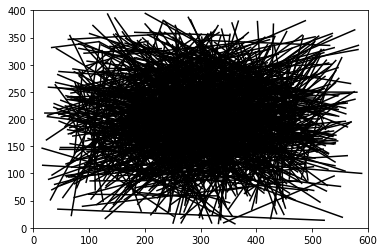

In [62]:
import matplotlib
import matplotlib.pyplot as plt    
import random


s = (600,400)
N = 1000

segs = []
colors = []
my_cmap = plt.get_cmap('jet')
for i in range(N):
    x1 = random.triangular() * s[0]
    y1 = random.triangular() * s[1]
    x2 = random.triangular() * s[0]
    y2 = random.triangular() * s[1]
    c  = random.triangular()
    colors.append(my_cmap(c))
    segs.append(((x1, y1), (x2, y2)))

ln_coll = matplotlib.collections.LineCollection(segs, colors='black')

ax = plt.gca()
ax.add_collection(ln_coll)
ax.set_xlim(0, 600)    
ax.set_ylim(0, 400)
plt.draw()